# Laboratory 2 - King County House Prices: Linear Regression
Submitted by: Anthony Aromin


## Initial Setup

In [206]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [207]:
# import the cleaned dataset
df = pd.read_csv('house_data_cleaned.csv')

In [208]:
# just checking cuz I forgor 💀
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,7.504021e+09,20141204T000000,745000.0,3.0,2.50,2970.0,11985.0,1.0,False,...,9,1770.0,1200.0,1995,0,98074.0,47.6359,-122.052,2990,12049.0
1,3,8.024202e+09,20141117T000000,397000.0,2.0,1.00,1000.0,7664.0,1.0,False,...,7,1000.0,0.0,1939,0,98115.0,47.7001,-122.311,1570,6350.0
2,5,5.437401e+09,20141016T000000,625000.0,4.0,2.25,1920.0,8259.0,2.0,False,...,8,1920.0,0.0,1979,0,98027.0,47.5616,-122.088,2030,8910.0
3,7,3.832600e+09,20150504T000000,270000.0,3.0,2.25,1740.0,7345.0,1.0,False,...,7,1380.0,360.0,1973,0,98032.0,47.3663,-122.285,1770,8250.0
4,8,9.477001e+09,20140722T000000,360000.0,3.0,1.75,1300.0,7770.0,1.0,False,...,7,1300.0,0.0,1967,0,98034.0,47.7347,-122.192,1520,7600.0


In [209]:
# choosing only the necessary data
df.drop([
    'Unnamed: 0',
    'id',
    'date',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long'
], axis=1, inplace=True)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,745000.0,3.0,2.50,2970.0,11985.0,1.0,False,0,3,9,1770.0,1200.0,2990,12049.0
1,397000.0,2.0,1.00,1000.0,7664.0,1.0,False,2,3,7,1000.0,0.0,1570,6350.0
2,625000.0,4.0,2.25,1920.0,8259.0,2.0,False,0,4,8,1920.0,0.0,2030,8910.0
3,270000.0,3.0,2.25,1740.0,7345.0,1.0,False,0,3,7,1380.0,360.0,1770,8250.0
4,360000.0,3.0,1.75,1300.0,7770.0,1.0,False,0,3,7,1300.0,0.0,1520,7600.0


In [210]:
# specifying data (x) and target (y)
x = df.iloc[:, 1:]
y = df['price']

## Training

In [211]:
# split the data for training
# 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [212]:
# create regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Testing

In [213]:
# predict house prices using the model
y_predict = model.predict(x_test)

In [214]:
# check root mean square error
rmse = np.sqrt(np.square(y_test - y_predict).mean())

print('Root Mean Squared Error: ${:.2f}'.format(rmse))

Root Mean Squared Error: $233582.06


In [215]:
# check normalized RMSE
n_rmse = rmse / (y_test.max() - y_test.min())

print('Error: {:.2f} %'.format(n_rmse * 100))

Error: 6.43 %


[Text(0.5, 0, 'Predicted Prices (in $)'),
 Text(0, 0.5, 'Actual Prices (in $)'),
 Text(0.5, 1.0, 'Comparison between Actual and Predicted Prices using Linear Regression')]

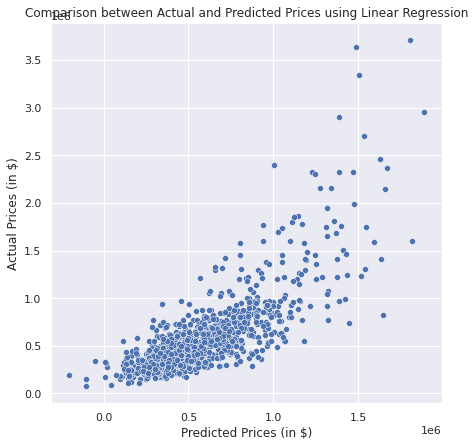

In [216]:
# visually compare predictions with actual values
data = pd.DataFrame(zip(y_test, y_predict), columns=['actual prices', 'predicted prices'])

sns.set(rc={'figure.figsize':(7, 7)})
sns.scatterplot(
    data=data,
    x='predicted prices',
    y='actual prices'
).set(
    xlabel='Predicted Prices (in $)',
    ylabel='Actual Prices (in $)',
    title='Comparison between Actual and Predicted Prices using Linear Regression'
)